<a href="https://colab.research.google.com/github/danielelbrecht/CAP5610-HW-1/blob/master/CAP5610_HW1Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import sklearn
from keras.datasets import mnist

#Load data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()




Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#Preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


#Prepare data for binary classifiers
binary_labels = []
binary_test_labels = []

#Training labels
for i in range(10):
  temp = []
  for j in range(len(train_labels_original)):
    if train_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_labels.append(temp)
 
#Test Labels
for i in range(10):
  temp = []
  for j in range(len(test_labels_original)):
    if test_labels_original[j] == i:
      temp.append(1)
    else:
      temp.append(0)
      
  binary_test_labels.append(temp)
  




In [0]:
#Use one-hot encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
#Some functions
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def activation(w, x):
  return np.dot(w,x)

def gradient(w, x, y):
  return np.dot(np.transpose(x), np.transpose(sigmoid(np.dot(x, w))-y))

def mse(w, x, y):
  loss = 0
  predictions = sigmoid(np.dot(x, w))
  for i in range(len(y)):
    loss = loss + (np.square(predictions[i]-y[i]))
                   
  loss = loss / len(y)
  return loss
  


In [0]:
import random

#Initialize weight matrix (for 10 classifiers)
weights = []

for i in range(10):
  weights.append([])
  for j in range(784):
    weights[i].append(random.random())
    




In [43]:
#Training

#Hyperparameters
epochs = 20
batch_size = 100
learning_rate = 0.01

training_loss_history = []
test_loss_history = []
batch_count = []



#Iterate over epochs
for i in range(epochs):
  #Iterate over mini batches
  for j in range(int(len(train_images)/batch_size)):
    
    #get mini batch
    data = train_images[batch_size*j:min(len(train_images), batch_size*(j+1))]
    labels = binary_labels[0][batch_size*j:min(len(train_images), batch_size*(j+1))]
    

    
    #adjust weights
    weights[0] = weights[0] - learning_rate * gradient(weights[0], data, labels)
    
    
  
  training_loss = mse(weights[0], train_images, binary_labels[0])
  test_loss = mse(weights[0], test_images, binary_test_labels[0])
  
  batch_count.append(i)
  
  training_loss_history.append(training_loss)
  test_loss_history.append(test_loss)
  print("Epoch", i, 'Training loss:', training_loss, 'Test Loss', test_loss)
  
  

Epoch 0 Training loss: 0.012408051845194844 Test Loss 0.010079384902881681
Epoch 1 Training loss: 0.009889788738251819 Test Loss 0.007970642926557688
Epoch 2 Training loss: 0.008951665888464494 Test Loss 0.007176356059121227
Epoch 3 Training loss: 0.008428915960674176 Test Loss 0.006747200764928677
Epoch 4 Training loss: 0.008068136565852762 Test Loss 0.006476806725371388
Epoch 5 Training loss: 0.007792477281838035 Test Loss 0.006291801261800689
Epoch 6 Training loss: 0.007569921918111743 Test Loss 0.006158123299811877
Epoch 7 Training loss: 0.0073843033021071215 Test Loss 0.0060577691804292915
Epoch 8 Training loss: 0.007226337812257602 Test Loss 0.005980355161300515
Epoch 9 Training loss: 0.007090079798464207 Test Loss 0.005919393641884517
Epoch 10 Training loss: 0.0069713557873709794 Test Loss 0.005870552352244057
Epoch 11 Training loss: 0.0068670459765777635 Test Loss 0.005830802120159399
Epoch 12 Training loss: 0.0067747319813792175 Test Loss 0.005797965574714489
Epoch 13 Training

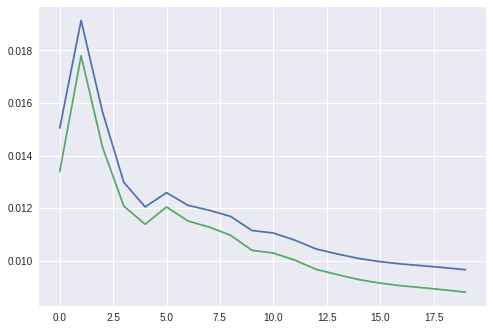

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(batch_count, training_loss_history)
plt.plot(batch_count, test_loss_history)
plt.show()
